In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bassanttarek","key":"343631da8363d85eb9d6f2a3cbf2650b"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d camnugent/california-housing-prices

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
100% 400k/400k [00:00<00:00, 566kB/s]
100% 400k/400k [00:00<00:00, 565kB/s]


In [4]:
!unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


Start The project ... Load the Dataset

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor, Lasso, ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
df = pd.read_csv('housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [58]:
print(df.info())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

In [59]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64



**Handle Missing Values**

In [88]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [89]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']


In [90]:
print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


Features (X) shape: (20640, 9)
Target (y) shape: (20640,)


**Split the dataset**

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (16512, 9)
Test set shape: (4128, 9)


**Data Visualization**

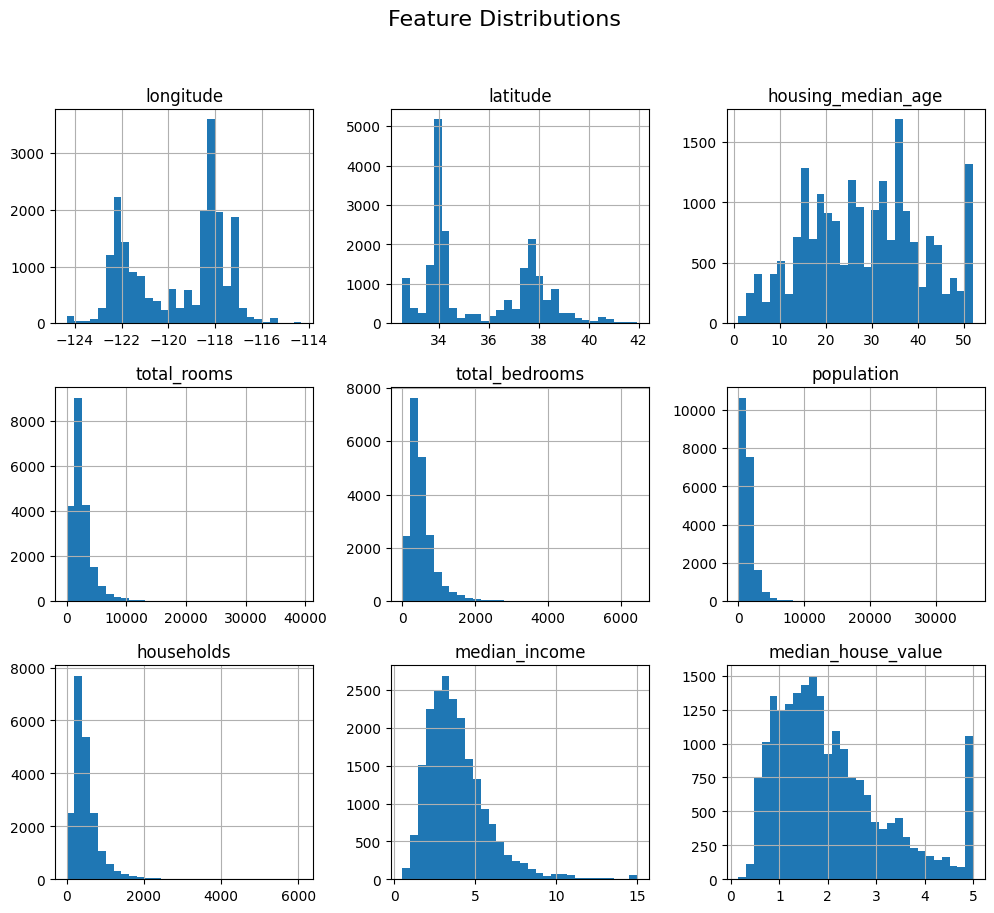

In [92]:
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

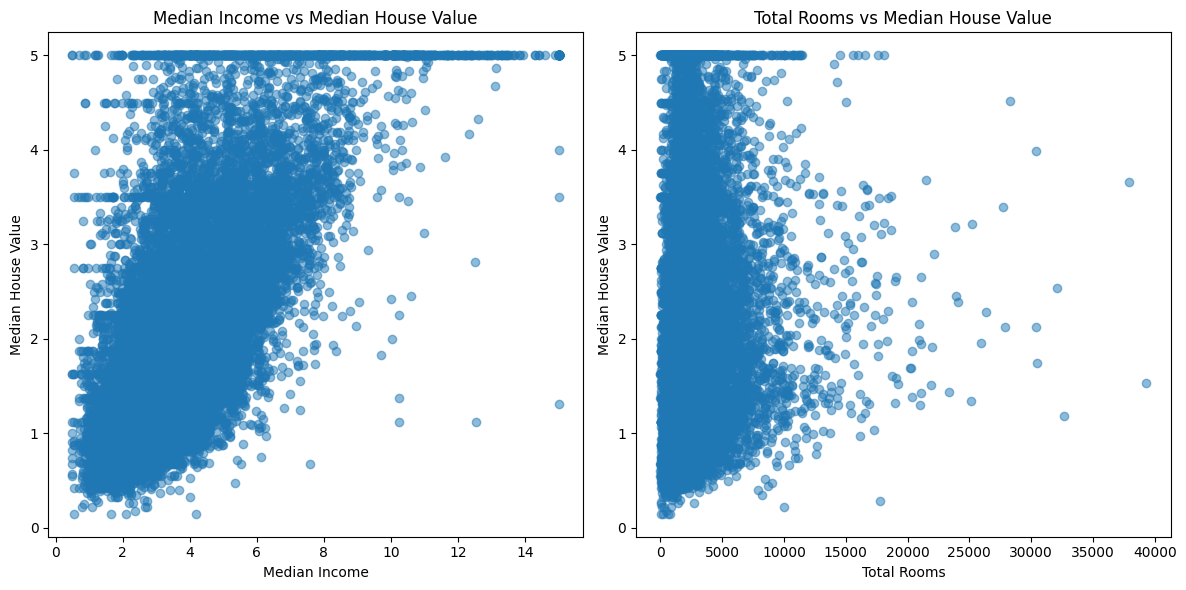

In [93]:
# Scatter plots for important features against the target
plt.figure(figsize=(12, 6))

# Median income vs. median house value
plt.subplot(1, 2, 1)
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

# Total rooms vs. median house value
plt.subplot(1, 2, 2)
plt.scatter(df['total_rooms'], df['median_house_value'], alpha=0.5)
plt.title('Total Rooms vs Median House Value')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')

plt.tight_layout()
plt.show()


Scale the target variable (median_house_value) by 100,000


In [94]:
df['median_house_value'] = df['median_house_value'] / 100000

In [95]:
num_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                'population', 'households', 'median_income']
cat_features = ['ocean_proximity']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
])

**Linear Regression**

In [96]:
# Initialize and train the Linear Regression model on scaled data
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('regressor', LinearRegression())])

In [97]:
predicted_values = model.predict(X_test)

In [98]:
mean_squared_err = mean_squared_error(y_test, predicted_values)
root_mean_squared_err = np.sqrt(mean_squared_err)
mean_absolute_err = mean_absolute_error(y_test, predicted_values)
mean_abs_percentage_err = np.mean(np.abs((y_test - predicted_values) / y_test)) * 100
r_squared_value = r2_score(y_test, predicted_values)

# Print results
print("Linear Regression (OLS) Evaluation:")
print(f'Mean Squared Error (MSE): {mean_squared_err:.4f}')
print(f'Root Mean Squared Error (RMSE): {root_mean_squared_err:.4f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_err:.4f}')
print(f'Mean Absolute Percentage Error (MAPE) (%): {mean_abs_percentage_err:.4f}')
print(f'R squared (R²): {r_squared_value:.4f}')


Linear Regression (OLS) Evaluation:
Mean Squared Error (MSE): 0.4908
Root Mean Squared Error (RMSE): 0.7006
Mean Absolute Error (MAE): 0.5067
Mean Absolute Percentage Error (MAPE) (%): 29.1907
R squared (R²): 0.6254


**SGDRegressor**

In [101]:
model_sgd = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(max_iter=1000, tol=1e-3))
])

model_sgd.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('regressor', SGDRegressor())])

In [102]:
predicted_values_sgd = model_sgd.predict(X_test)

In [103]:
mean_squared_err_sgd = mean_squared_error(y_test, predicted_values_sgd)
root_mean_squared_err_sgd = np.sqrt(mean_squared_err_sgd)
mean_absolute_err_sgd = mean_absolute_error(y_test, predicted_values_sgd)
mean_abs_percentage_err_sgd = np.mean(np.abs((y_test - predicted_values_sgd) / y_test)) * 100
r_squared_value_sgd = r2_score(y_test, predicted_values_sgd)

# Print results for SGD Regression
print("\nSGD Regression Evaluation:")
print(f'Mean Squared Error (MSE): {mean_squared_err_sgd:.4f}')
print(f'Root Mean Squared Error (RMSE): {root_mean_squared_err_sgd:.4f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_err_sgd:.4f}')
print(f'Mean Absolute Percentage Error (MAPE) (%): {mean_abs_percentage_err_sgd:.4f}')
print(f'R squared (R²): {r_squared_value_sgd:.4f}')


SGD Regression Evaluation:
Mean Squared Error (MSE): 0.4905
Root Mean Squared Error (RMSE): 0.7003
Mean Absolute Error (MAE): 0.5072
Mean Absolute Percentage Error (MAPE) (%): 29.2426
R squared (R²): 0.6257


**Lasso Regression**

In [104]:
model_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

model_lasso.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('regressor', Lasso())])

In [105]:
predicted_values_lasso = model_lasso.predict(X_test)

In [106]:
mean_squared_err_lasso = mean_squared_error(y_test, predicted_values_lasso)
root_mean_squared_err_lasso = np.sqrt(mean_squared_err_lasso)
mean_absolute_err_lasso = mean_absolute_error(y_test, predicted_values_lasso)
mean_abs_percentage_err_lasso = np.mean(np.abs((y_test - predicted_values_lasso) / y_test)) * 100
r_squared_value_lasso = r2_score(y_test, predicted_values_lasso)

# Print results for Lasso Regression
print("\nLasso Regression Evaluation:")
print(f'Mean Squared Error (MSE): {mean_squared_err_lasso:.4f}')
print(f'Root Mean Squared Error (RMSE): {root_mean_squared_err_lasso:.4f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_err_lasso:.4f}')
print(f'Mean Absolute Percentage Error (MAPE) (%): {mean_abs_percentage_err_lasso:.4f}')
print(f'R squared (R²): {r_squared_value_lasso:.4f}')


Lasso Regression Evaluation:
Mean Squared Error (MSE): 1.3107
Root Mean Squared Error (RMSE): 1.1449
Mean Absolute Error (MAE): 0.9061
Mean Absolute Percentage Error (MAPE) (%): 62.8861
R squared (R²): -0.0002


**Elastic Net Regression**



In [107]:
model_elastic_net = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])

model_elastic_net.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('regressor', ElasticNet())])

In [108]:
predicted_values_elastic_net = model_elastic_net.predict(X_test)

In [109]:
mean_squared_err_elastic_net = mean_squared_error(y_test, predicted_values_elastic_net)
root_mean_squared_err_elastic_net = np.sqrt(mean_squared_err_elastic_net)
mean_absolute_err_elastic_net = mean_absolute_error(y_test, predicted_values_elastic_net)
mean_abs_percentage_err_elastic_net = np.mean(np.abs((y_test - predicted_values_elastic_net) / y_test)) * 100
r_squared_value_elastic_net = r2_score(y_test, predicted_values_elastic_net)

# Print results for Elastic Net Regression
print("\nElastic Net Regression Evaluation:")
print(f'Mean Squared Error (MSE): {mean_squared_err_elastic_net:.4f}')
print(f'Root Mean Squared Error (RMSE): {root_mean_squared_err_elastic_net:.4f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_err_elastic_net:.4f}')
print(f'Mean Absolute Percentage Error (MAPE) (%): {mean_abs_percentage_err_elastic_net:.4f}')
print(f'R squared (R²): {r_squared_value_elastic_net:.4f}')


Elastic Net Regression Evaluation:
Mean Squared Error (MSE): 1.0442
Root Mean Squared Error (RMSE): 1.0219
Mean Absolute Error (MAE): 0.8060
Mean Absolute Percentage Error (MAPE) (%): 55.5407
R squared (R²): 0.2031


**Polynomial Regression (Degree=2)**

In [112]:
model_poly = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

model_poly.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('poly', PolynomialFeatures()),
                ('regressor', LinearRegression())])

In [113]:
predicted_values_poly = model_poly.predict(X_test)

In [114]:
mean_squared_err_poly = mean_squared_error(y_test, predicted_values_poly)
root_mean_squared_err_poly = np.sqrt(mean_squared_err_poly)
mean_absolute_err_poly = mean_absolute_error(y_test, predicted_values_poly)
mean_abs_percentage_err_poly = np.mean(np.abs((y_test - predicted_values_poly) / y_test)) * 100
r_squared_value_poly = r2_score(y_test, predicted_values_poly)

# Print results for Polynomial Regression
print("\nPolynomial Regression (Degree 2) Evaluation:")
print(f'Mean Squared Error (MSE): {mean_squared_err_poly:.4f}')
print(f'Root Mean Squared Error (RMSE): {root_mean_squared_err_poly:.4f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_err_poly:.4f}')
print(f'Mean Absolute Percentage Error (MAPE) (%): {mean_abs_percentage_err_poly:.4f}')
print(f'R squared (R²): {r_squared_value_poly:.4f}')


Polynomial Regression (Degree 2) Evaluation:
Mean Squared Error (MSE): 0.4509
Root Mean Squared Error (RMSE): 0.6715
Mean Absolute Error (MAE): 0.4639
Mean Absolute Percentage Error (MAPE) (%): 26.5354
R squared (R²): 0.6559


**K-Nearest Neighbors (KNN) Regression**

In [115]:
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

model_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('regressor', KNeighborsRegressor())])

In [116]:
predicted_values_knn = model_knn.predict(X_test)

In [117]:
mean_squared_err_knn = mean_squared_error(y_test, predicted_values_knn)
root_mean_squared_err_knn = np.sqrt(mean_squared_err_knn)
mean_absolute_err_knn = mean_absolute_error(y_test, predicted_values_knn)
mean_abs_percentage_err_knn = np.mean(np.abs((y_test - predicted_values_knn) / y_test)) * 100
r_squared_value_knn = r2_score(y_test, predicted_values_knn)

# Print results for K-Nearest Neighbors
print("\nK-Nearest Neighbors (KNN) Regression Evaluation:")
print(f'Mean Squared Error (MSE): {mean_squared_err_knn:.4f}')
print(f'Root Mean Squared Error (RMSE): {root_mean_squared_err_knn:.4f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_err_knn:.4f}')
print(f'Mean Absolute Percentage Error (MAPE) (%): {mean_abs_percentage_err_knn:.4f}')
print(f'R squared (R²): {r_squared_value_knn:.4f}')


K-Nearest Neighbors (KNN) Regression Evaluation:
Mean Squared Error (MSE): 0.3761
Root Mean Squared Error (RMSE): 0.6133
Mean Absolute Error (MAE): 0.4078
Mean Absolute Percentage Error (MAPE) (%): 22.0815
R squared (R²): 0.7130


**Decision Tree Regression**

In [118]:
model_decision_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

model_decision_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [119]:
predicted_values_decision_tree = model_decision_tree.predict(X_test)

In [120]:
mean_squared_err_decision_tree = mean_squared_error(y_test, predicted_values_decision_tree)
root_mean_squared_err_decision_tree = np.sqrt(mean_squared_err_decision_tree)
mean_absolute_err_decision_tree = mean_absolute_error(y_test, predicted_values_decision_tree)
mean_abs_percentage_err_decision_tree = np.mean(np.abs((y_test - predicted_values_decision_tree) / y_test)) * 100
r_squared_value_decision_tree = r2_score(y_test, predicted_values_decision_tree)

# Print results for Decision Tree
print("\nDecision Tree Regression Evaluation:")
print(f'Mean Squared Error (MSE): {mean_squared_err_decision_tree:.4f}')
print(f'Root Mean Squared Error (RMSE): {root_mean_squared_err_decision_tree:.4f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_err_decision_tree:.4f}')
print(f'Mean Absolute Percentage Error (MAPE) (%): {mean_abs_percentage_err_decision_tree:.4f}')
print(f'R squared (R²): {r_squared_value_decision_tree:.4f}')


Decision Tree Regression Evaluation:
Mean Squared Error (MSE): 0.4815
Root Mean Squared Error (RMSE): 0.6939
Mean Absolute Error (MAE): 0.4368
Mean Absolute Percentage Error (MAPE) (%): 23.9039
R squared (R²): 0.6326


**Random Forest**

In [122]:
model_random_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
model_random_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [123]:
predicted_values_random_forest = model_random_forest.predict(X_test)

In [124]:
mean_squared_err_random_forest = mean_squared_error(y_test, predicted_values_random_forest)
root_mean_squared_err_random_forest = np.sqrt(mean_squared_err_random_forest)
mean_absolute_err_random_forest = mean_absolute_error(y_test, predicted_values_random_forest)
mean_abs_percentage_err_random_forest = np.mean(np.abs((y_test - predicted_values_random_forest) / y_test)) * 100
r_squared_value_random_forest = r2_score(y_test, predicted_values_random_forest)

# Print results for Random Forest
print("\nRandom Forest Regression Evaluation:")
print(f'Mean Squared Error (MSE): {mean_squared_err_random_forest:.4f}')
print(f'Root Mean Squared Error (RMSE): {root_mean_squared_err_random_forest:.4f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_err_random_forest:.4f}')
print(f'Mean Absolute Percentage Error (MAPE) (%): {mean_abs_percentage_err_random_forest:.4f}')
print(f'R squared (R²): {r_squared_value_random_forest:.4f}')


Random Forest Regression Evaluation:
Mean Squared Error (MSE): 0.2403
Root Mean Squared Error (RMSE): 0.4902
Mean Absolute Error (MAE): 0.3167
Mean Absolute Percentage Error (MAPE) (%): 17.7808
R squared (R²): 0.8167


**xgboost**

In [127]:
model_xgboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, random_state=42))
])

model_xgboost.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, co...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [128]:
predicted_values_xgboost = model_xgboost.predict(X_test)

In [129]:
mean_squared_err_xgboost = mean_squared_error(y_test, predicted_values_xgboost)
root_mean_squared_err_xgboost = np.sqrt(mean_squared_err_xgboost)
mean_absolute_err_xgboost = mean_absolute_error(y_test, predicted_values_xgboost)
mean_abs_percentage_err_xgboost = np.mean(np.abs((y_test - predicted_values_xgboost) / y_test)) * 100
r_squared_value_xgboost = r2_score(y_test, predicted_values_xgboost)

# Print results for XGBoost
print("\nXGBoost Regression Evaluation:")
print(f'Mean Squared Error (MSE): {mean_squared_err_xgboost:.4f}')
print(f'Root Mean Squared Error (RMSE): {root_mean_squared_err_xgboost:.4f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_err_xgboost:.4f}')
print(f'Mean Absolute Percentage Error (MAPE) (%): {mean_abs_percentage_err_xgboost:.4f}')
print(f'R squared (R²): {r_squared_value_xgboost:.4f}')


XGBoost Regression Evaluation:
Mean Squared Error (MSE): 0.2267
Root Mean Squared Error (RMSE): 0.4761
Mean Absolute Error (MAE): 0.3161
Mean Absolute Percentage Error (MAPE) (%): 17.9201
R squared (R²): 0.8270


**Support Vector Regression (SVR)**

In [130]:
model_svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

model_svr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('regressor', SVR())])

In [131]:
predicted_values_svr = model_svr.predict(X_test)

In [132]:
mean_squared_err_svr = mean_squared_error(y_test, predicted_values_svr)
root_mean_squared_err_svr = np.sqrt(mean_squared_err_svr)
mean_absolute_err_svr = mean_absolute_error(y_test, predicted_values_svr)
mean_abs_percentage_err_svr = np.mean(np.abs((y_test - predicted_values_svr) / y_test)) * 100
r_squared_value_svr = r2_score(y_test, predicted_values_svr)

# Print results for SVR
print("\nSupport Vector Regression (SVR) Evaluation:")
print(f'Mean Squared Error (MSE): {mean_squared_err_svr:.4f}')
print(f'Root Mean Squared Error (RMSE): {root_mean_squared_err_svr:.4f}')
print(f'Mean Absolute Error (MAE): {mean_absolute_err_svr:.4f}')
print(f'Mean Absolute Percentage Error (MAPE) (%): {mean_abs_percentage_err_svr:.4f}')
print(f'R squared (R²): {r_squared_value_svr:.4f}')


Support Vector Regression (SVR) Evaluation:
Mean Squared Error (MSE): 0.3277
Root Mean Squared Error (RMSE): 0.5725
Mean Absolute Error (MAE): 0.3751
Mean Absolute Percentage Error (MAPE) (%): 20.0051
R squared (R²): 0.7499


***Comparisons between All Models ***

In [135]:
# Create a dictionary to store all evaluation results
results_dict = {
    'Model': ['Linear Regression', 'SGD Regression', 'Lasso Regression', 'Elastic Net Regression',
              'Polynomial Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVR'],
    'MSE': [mean_squared_err, mean_squared_err_sgd, mean_squared_err_lasso, mean_squared_err_elastic_net,
            mean_squared_err_poly, mean_squared_err_knn, mean_squared_err_decision_tree,
            mean_squared_err_random_forest, mean_squared_err_xgboost, mean_squared_err_svr],
    'RMSE': [root_mean_squared_err, root_mean_squared_err_sgd, root_mean_squared_err_lasso,
             root_mean_squared_err_elastic_net, root_mean_squared_err_poly, root_mean_squared_err_knn,
             root_mean_squared_err_decision_tree, root_mean_squared_err_random_forest,
             root_mean_squared_err_xgboost, root_mean_squared_err_svr],
    'MAE': [mean_absolute_err, mean_absolute_err_sgd, mean_absolute_err_lasso, mean_absolute_err_elastic_net,
            mean_absolute_err_poly, mean_absolute_err_knn, mean_absolute_err_decision_tree,
            mean_absolute_err_random_forest, mean_absolute_err_xgboost, mean_absolute_err_svr],
    'MAPE (%)': [mean_abs_percentage_err, mean_abs_percentage_err_sgd, mean_abs_percentage_err_lasso,
                 mean_abs_percentage_err_elastic_net, mean_abs_percentage_err_poly, mean_abs_percentage_err_knn,
                 mean_abs_percentage_err_decision_tree, mean_abs_percentage_err_random_forest,
                 mean_abs_percentage_err_xgboost, mean_abs_percentage_err_svr],
    'R²': [r_squared_value, r_squared_value_sgd, r_squared_value_lasso, r_squared_value_elastic_net,
           r_squared_value_poly, r_squared_value_knn, r_squared_value_decision_tree,
           r_squared_value_random_forest, r_squared_value_xgboost, r_squared_value_svr]
}

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results_dict)


In [136]:
results_df = results_df.sort_values(by='R²', ascending=False)
print("Model Comparison Results:")
print(results_df)

Model Comparison Results:
                    Model       MSE      RMSE       MAE   MAPE (%)        R²
8                 XGBoost  0.226698  0.476128  0.316060  17.920062  0.827002
7           Random Forest  0.240257  0.490160  0.316726  17.780836  0.816655
9                     SVR  0.327716  0.572465  0.375135  20.005130  0.749913
5     K-Nearest Neighbors  0.376098  0.613268  0.407801  22.081502  0.712992
4   Polynomial Regression  0.450870  0.671468  0.463888  26.535421  0.655932
6           Decision Tree  0.481471  0.693881  0.436845  23.903897  0.632580
1          SGD Regression  0.490475  0.700339  0.507225  29.242587  0.625708
0       Linear Regression  0.490848  0.700605  0.506707  29.190663  0.625424
3  Elastic Net Regression  1.044231  1.021876  0.805995  55.540712  0.203126
2        Lasso Regression  1.310696  1.144856  0.906069  62.886150 -0.000219


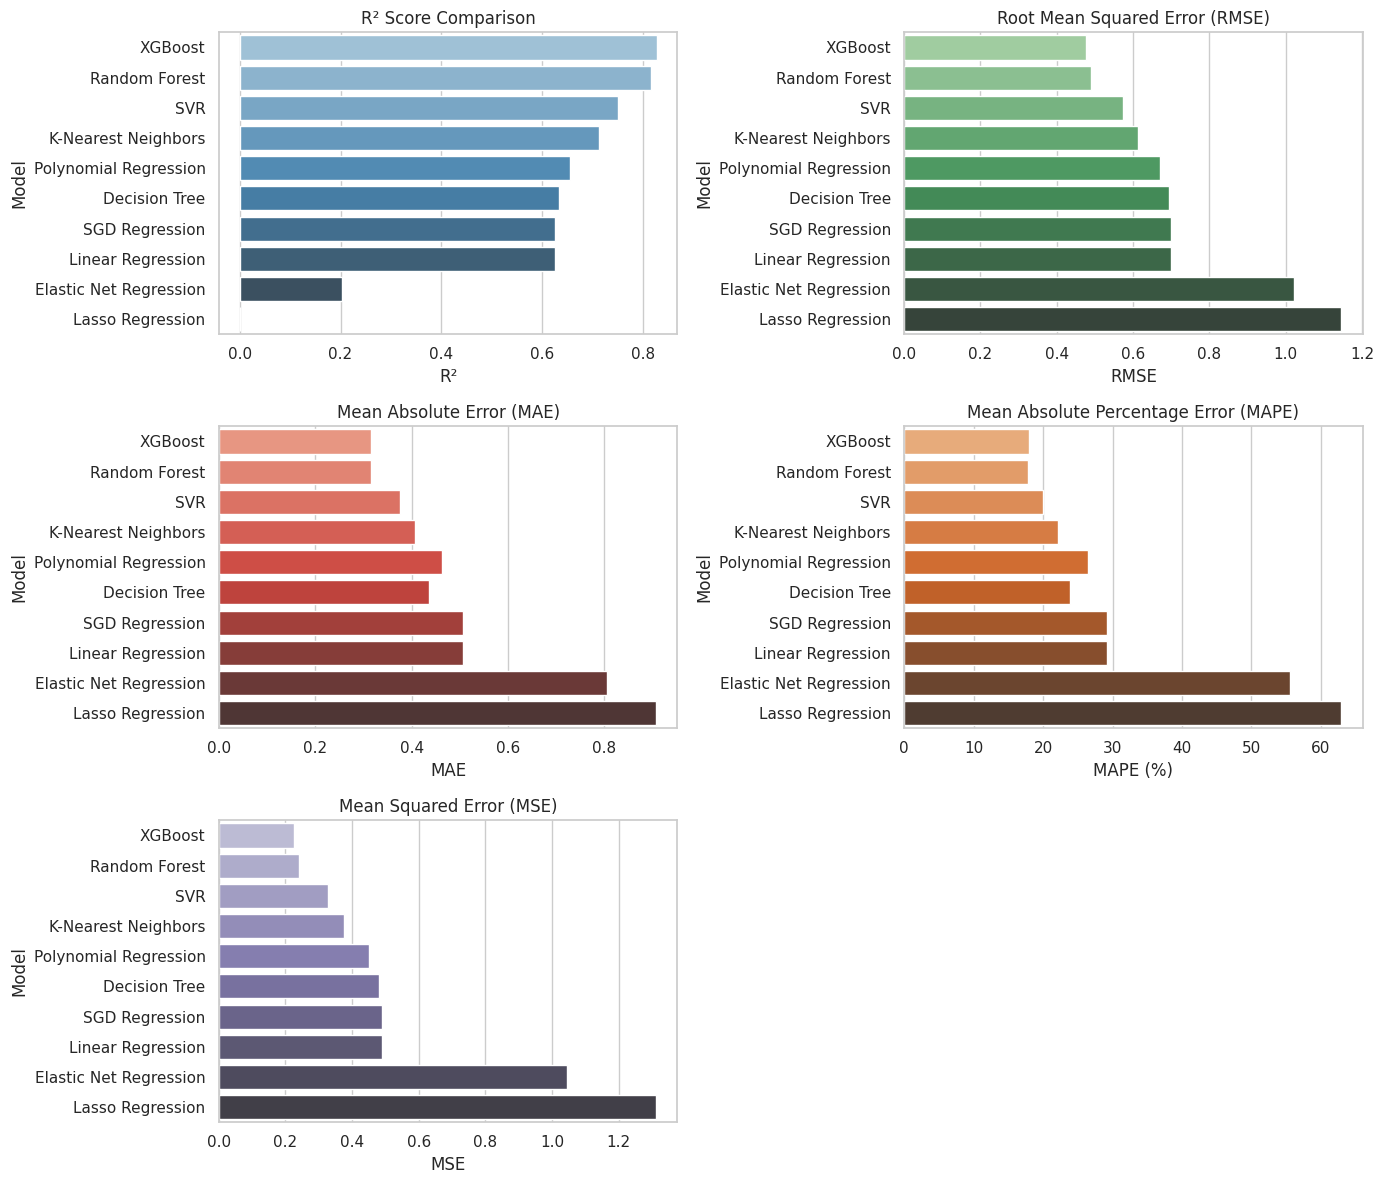

In [140]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Flatten axes for easier indexing
axes = axes.flatten()

# Remove the last empty plot (since we only need 5)
fig.delaxes(axes[5])

# Plot R² Score
sns.barplot(x='R²', y='Model', hue='Model', data=results_df, ax=axes[0], legend=False, palette="Blues_d")
axes[0].set_title('R² Score Comparison')

# Plot RMSE
sns.barplot(x='RMSE', y='Model', hue='Model', data=results_df, ax=axes[1], legend=False, palette="Greens_d")
axes[1].set_title('Root Mean Squared Error (RMSE)')

# Plot MAE
sns.barplot(x='MAE', y='Model', hue='Model', data=results_df, ax=axes[2], legend=False, palette="Reds_d")
axes[2].set_title('Mean Absolute Error (MAE)')

# Plot MAPE (%)
sns.barplot(x='MAPE (%)', y='Model', hue='Model', data=results_df, ax=axes[3], legend=False, palette="Oranges_d")
axes[3].set_title('Mean Absolute Percentage Error (MAPE)')

# Plot MSE
sns.barplot(x='MSE', y='Model', hue='Model', data=results_df, ax=axes[4], legend=False, palette="Purples_d")
axes[4].set_title('Mean Squared Error (MSE)')

# Adjust layout
plt.tight_layout()
plt.show()

In [141]:
best_model = results_df.iloc[0]
second_best_model = results_df.iloc[1]

print(f"\nBest Model: {best_model['Model']} with R²: {best_model['R²']:.4f}")
print(f"Second Best Model: {second_best_model['Model']} with R²: {second_best_model['R²']:.4f}")


Best Model: XGBoost with R²: 0.8270
Second Best Model: Random Forest with R²: 0.8167
